In [1]:
import keypoint_moseq as kpms

project_dir='/Users/fsp585/Desktop/salient_2' # the full path to the project directory
model_name='kappa_scan_1_28172691' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)

In [2]:
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 

In [3]:
stats_df = kpms.compute_stats_df(
        project_dir,
        model_name,
        moseq_df, 
        min_frequency=0.005,       # threshold frequency for including a syllable in the dataframe
        groupby=['group', 'name'], # column(s) to group the dataframe by
        fps=60)                    # frame rate of the video from which keypoints were inferred
stat_cols = stats_df.columns[3:]

In [4]:
# kpms.label_syllables(project_dir, model_name, moseq_df) 


In [5]:
import re

text = """
syllable	label
0	Run
1	Fast walk/run
2	Walk/fast walk
3	Sniff
4	Walk
5	Left Turn
6	Right Turn
7	Right Turn Large
8	Retract Snout
9	Left turn to run
10	Stop walk / Sniff
11	Sniff
12	Right turn to run
13	Left Turn
14	Walk
15	Back left / end wall rear
16	Sniff/groom
17	Stop walk/retract snout
18	Rear/groom
19	Retract snout/right turn/sniff
20	Groom/Rear
21	Right turn to run
22	Mixed right turn
23	Fast walk/run
24	Rear (some groom)
25	Turn and run (both sides)
26	Sniff
27	Run (slight right)
28	Rear / groom / misc.
29	Snout groom
30	Left turn
31	Retract snout/end wall rear
32	Rear/groom
33	Sit/sniff
"""

# Find all lines starting with digits, followed by a space, and then the rest of the line
matches = re.findall(r'^(\d+)\s+(.*)', text, flags=re.MULTILINE)

# Convert to a list of tuples with the number as an integer and the label as a string
result = [(int(num), label) for num, label in matches]

In [6]:
from collections import defaultdict
syllable_map = defaultdict(list)
syllable_lowest_mapping = {}

for idx, syll in result:
    syllable_map[syll].append(idx)
            
for syll, idxs in syllable_map.items():
    idx_min = min(idxs)
    for idx in idxs:
        syllable_lowest_mapping[idx] = idx_min

syllable_lowest_mapping

{0: 0,
 1: 1,
 23: 1,
 2: 2,
 3: 3,
 11: 3,
 26: 3,
 4: 4,
 14: 4,
 5: 5,
 13: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 12: 12,
 21: 12,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 32: 18,
 19: 19,
 20: 20,
 22: 22,
 24: 24,
 25: 25,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 33: 33}

In [7]:
syllable_lowest_mapping

{0: 0,
 1: 1,
 23: 1,
 2: 2,
 3: 3,
 11: 3,
 26: 3,
 4: 4,
 14: 4,
 5: 5,
 13: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 12: 12,
 21: 12,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 32: 18,
 19: 19,
 20: 20,
 22: 22,
 24: 24,
 25: 25,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 33: 33}

In [8]:
stats_df_with_mapping = stats_df.copy()
stats_df_with_mapping['syllable'] = stats_df['syllable'].map(syllable_lowest_mapping)


In [9]:
set(stats_df_with_mapping.syllable)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 15,
 16,
 17,
 18,
 19,
 20,
 22,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 33}

Group(s): IFDN, WT
Saved figure to /Users/fsp585/Desktop/salient_2/kappa_scan_1_28172691/figures/transition_matrices.png
Saved figure to /Users/fsp585/Desktop/salient_2/kappa_scan_1_28172691/figures/transition_graphs.png
Saved figure to /Users/fsp585/Desktop/salient_2/kappa_scan_1_28172691/figures/transition_graphs_diff.png


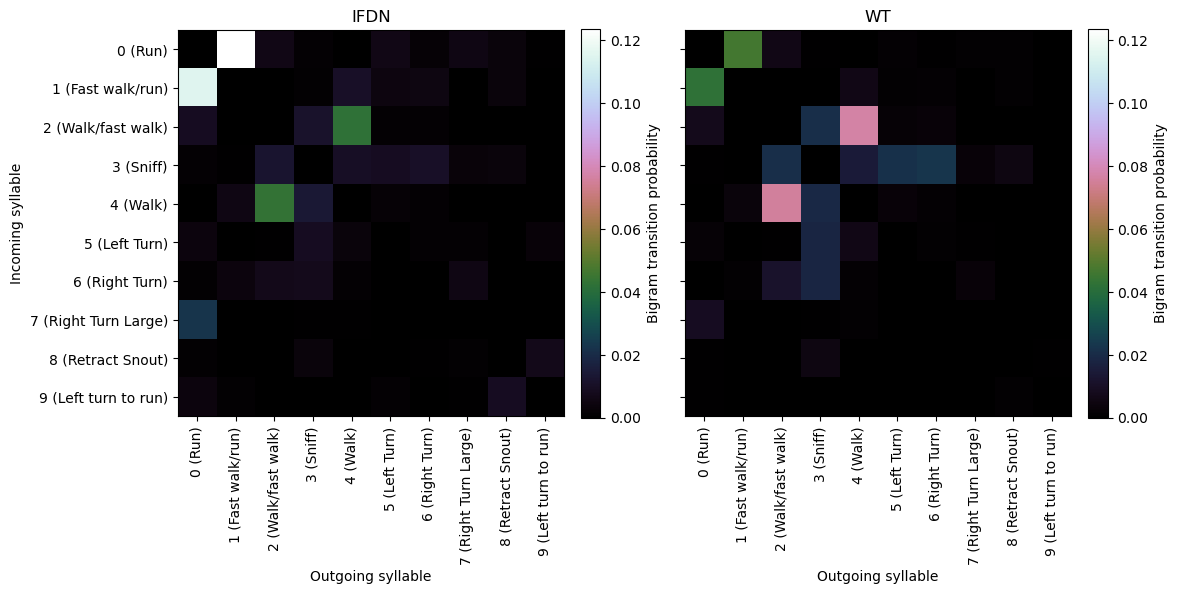

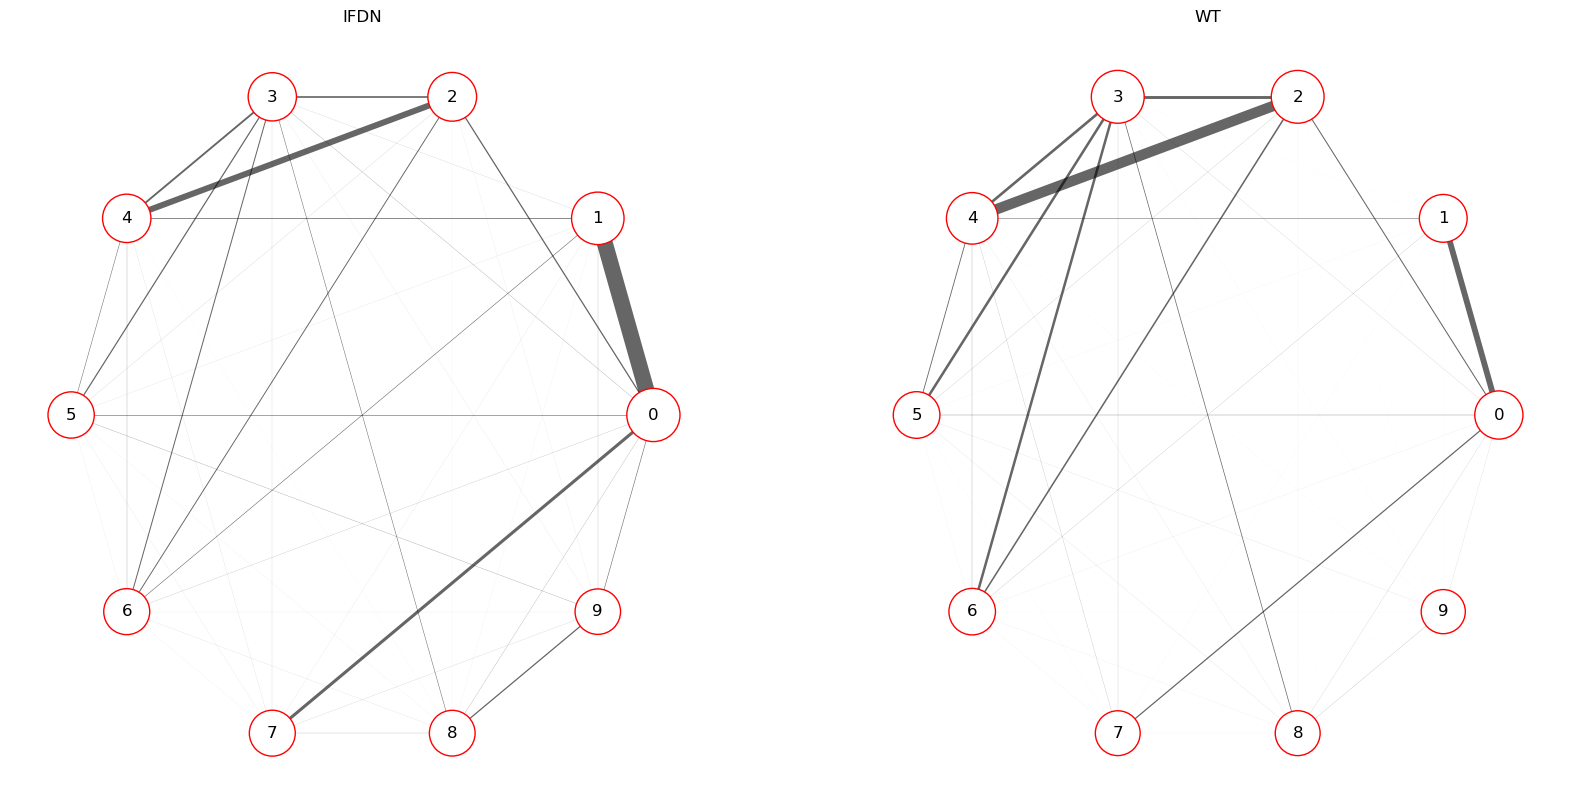

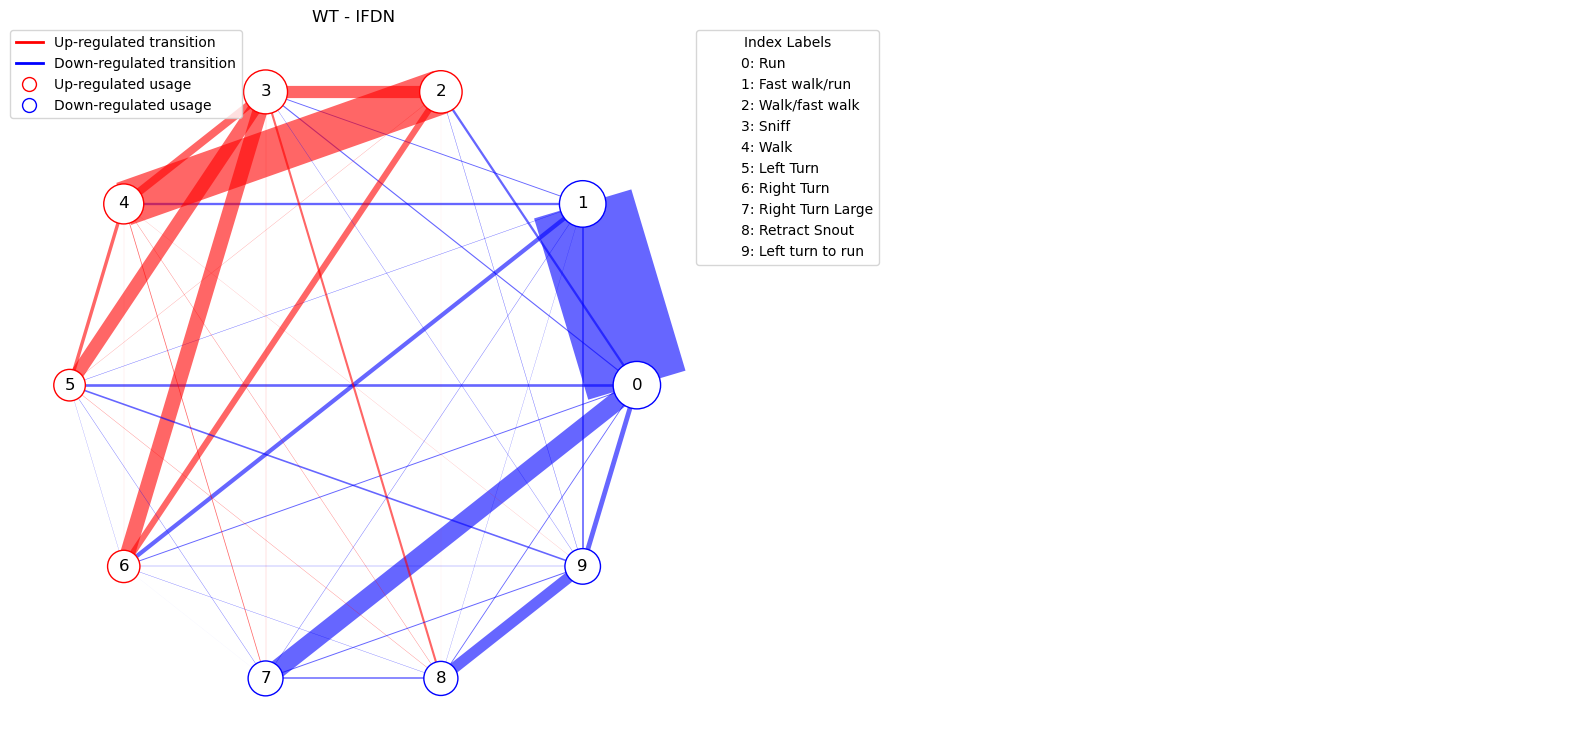

In [13]:
#model_name=f'kappa_scan_1_{suffix}' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)
moseq_df = kpms.compute_moseq_df(project_dir, model_name, smooth_heading=True) 

stats_df = kpms.compute_stats_df(
    project_dir,
    model_name,
    moseq_df, 
    min_frequency=0.05,       # threshold frequency for including a syllable in the dataframe
    groupby=['group', 'name'], # column(s) to group the dataframe by
    fps=60)                    # frame rate of the video from which keypoints were inferred

# for stat in stat_cols:
#     kpms.plot_syll_stats_with_sem(
#         stats_df, project_dir, model_name,
#         plot_sig=True,    # whether to mark statistical significance with a star
#         thresh=0.05,      # significance threshold
#         stat=stat,
#         order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
#         ctrl_group='a',   # name of the control group for statistical testing
#         exp_group='b',    # name of the experimental group for statistical testing
#         figsize=(8, 4),   # figure size    
#         groups=stats_df['group'].unique(), # groups to be plotted,
#         label_rotation=60
#     );

# kpms.plot_syll_stats_with_sem(
#         stats_df, project_dir, model_name,
#         plot_sig=True,    # whether to mark statistical significance with a star
#         thresh=0.05,      # significance threshold
#         order='diff',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
#         ctrl_group='WT',   # name of the control group for statistical testing
#         exp_group='IFDN',    # name of the experimental group for statistical testing
#         figsize=(8, 4),   # figure size    
#         groups=stats_df['group'].unique(), # groups to be plotted,
#         label_rotation=45
#     );

normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=0.018 # minimum syllable frequency to include
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)


kpms.plot_transition_graph_difference(project_dir, model_name, 
                                    groups[::-1], trans_mats, usages, syll_include, filepath='/Users/fsp585/Desktop/salient_2/kappa_scan_1_28172691/syll_info.csv',
                                    layout='circular') # transition graph layout ("circular" or "spring")